### Random under sampling - Class imbalance
### Feature extraction - PCA

In [2]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
len(df)

4250

In [5]:
len(df.columns)

20

In [6]:
len(df)

4250

In [7]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data preprocessing

In [8]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Data types of columns

In [9]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

##  encoding data

 Here international plan and voice mail plan are two columns with yes or no values. The best method to encode categorical variables with values Yes/No is replacing them with 1/0
Yes - 1
No - 0

In [10]:
features=["international_plan","voice_mail_plan","churn"]

In [11]:
def encodeYesNo(feature):
    df.loc[df[feature] == 'yes', feature] = 1
    df.loc[df[feature] == 'no', feature ] = 0

In [12]:
for feature in features:
    encodeYesNo(feature)

In [13]:
df[features].head()

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [14]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


###  Encoding Other features 

In [15]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [16]:
len(df["state"].unique())

51

In [17]:
df["area_code"].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [18]:
ordinal_features = ["state","area_code"]
ce_ord = ce.TargetEncoder(cols = ordinal_features)
df = ce_ord.fit_transform(df,df["churn"])

In [19]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,0.125000,147,0.136148,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,0.101449,117,0.139963,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,0.136691,141,0.136148,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,0.156627,65,0.136148,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,0.068966,74,0.136148,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


In [20]:
df["state"].unique()

array([0.12631579, 0.27083333, 0.20512821, 0.15730337, 0.125     ,
       0.10144928, 0.13669065, 0.15662651, 0.06896552, 0.11290323,
       0.2125    , 0.16666667, 0.11320755, 0.05      , 0.19387755,
       0.11842105, 0.1125    , 0.09090909, 0.19444444, 0.10526316,
       0.05194805, 0.12820513, 0.06557377, 0.109375  , 0.22093023,
       0.15492958, 0.07446809, 0.15151515, 0.17241379, 0.1625    ,
       0.12371134, 0.25641026, 0.14666667, 0.0875    , 0.225     ,
       0.17592593, 0.20481928, 0.11111111, 0.11627907, 0.14117647,
       0.17977528, 0.18292683, 0.12871287, 0.06849315, 0.15189873,
       0.07594937, 0.11940299, 0.17045455, 0.08955224])

In [21]:
df["area_code"].unique()

array([0.13614801, 0.13996317, 0.15056818])

## Scaling the dataset

In [22]:
scaled_df=df

In [23]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,107,0.136148,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.270833,137,0.136148,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0.126316,84,0.139963,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,0.205128,75,0.136148,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.157303,121,0.150568,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [24]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform(df[['account_length','number_vmail_messages', 'total_day_minutes',"total_day_calls","total_day_charge","total_eve_minutes","total_eve_charge","total_night_minutes","total_night_calls","total_night_charge","total_intl_minutes","total_intl_calls","total_intl_charge","number_customer_service_calls"]]) 


In [25]:
scaled_df['account_length'] = scaled[:,0]
scaled_df['number_vmail_messages'] = scaled[:,1]
scaled_df['total_day_minutes'] = scaled[:,2] 
scaled_df['total_day_calls'] = scaled[:,3]
scaled_df['total_day_charge'] = scaled[:,4]
scaled_df['total_eve_minutes'] = scaled[:,5]
scaled_df['total_eve_charge'] = scaled[:,6]
scaled_df['total_night_minutes'] = scaled[:,7]
scaled_df['total_night_calls'] = scaled[:,8] 
scaled_df['total_night_charge'] = scaled[:,9]
scaled_df['total_intl_minutes'] = scaled[:,10]
scaled_df['total_intl_calls'] = scaled[:,11]
scaled_df['total_intl_charge'] = scaled[:,12]
scaled_df['number_customer_service_calls'] = scaled[:,13]

In [26]:
scaled_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346,0
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960,0
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882,0


# Splitting training dataset into test and train

In [27]:
x = df.drop("churn",axis=1)


In [28]:
x.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.126316,0.170399,0.136148,0,1,1.366857,-0.345510,1.163449,-0.345788,-0.093025,103,-0.092493,1.070003,0.157309,1.070820,1.247901,-0.579164,1.248591,-0.426346
1,0.270833,0.926186,0.136148,0,0,-0.567911,1.169136,0.710014,1.169295,-1.571820,110,-1.572341,-0.753320,0.207083,-0.752053,0.704379,0.232927,0.698342,-1.188960
2,0.126316,-0.409038,0.139963,1,0,-0.567911,2.206058,-1.456398,2.206218,-2.752070,88,-2.752473,-0.072057,-0.539526,-0.072337,-1.324770,1.045017,-1.328187,0.336268
3,0.205128,-0.635774,0.136148,1,0,-0.567911,-0.251076,0.659633,-0.251027,-1.032448,122,-1.031447,-0.270676,1.053239,-0.270956,-0.056552,-0.579164,-0.053219,1.098882
4,0.157303,0.523099,0.150568,0,1,1.218029,0.702522,-0.599910,0.702027,2.952139,108,2.951497,0.239775,0.903917,0.241038,-0.998657,1.045017,-0.992669,1.098882


In [29]:
y = df[["churn"]]
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [56]:
import numpy as np
y=np.ravel(y,order='C')

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

## Before Handling Class Imbalance

In [58]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
dcls = DecisionTreeClassifier(max_depth= 3)
dcls.fit(x_train,y_train)
y_pred = dcls.predict(x_test)


In [85]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(dcls,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.01196718, 0.01196766, 0.01196814, 0.01302934, 0.01196885]), 'score_time': array([0.00398993, 0.0039897 , 0.0059855 , 0.00496101, 0.00398874]), 'test_accuracy': array([0.90352941, 0.90352941, 0.90823529, 0.91176471, 0.91058824]), 'test_precision': array([0.78461538, 0.78461538, 0.86206897, 0.9245283 , 0.87931034]), 'test_recall': array([0.42857143, 0.42857143, 0.41666667, 0.40833333, 0.425     ]), 'test_f1_score': array([0.55434783, 0.55434783, 0.56179775, 0.56647399, 0.57303371])}
Accuracy of model with cross validation score is :90.75294117647059
Precision of model with precision score is :0.8470276762924778
Precision of model with recall score is :0.4214285714285714
Precision of model with f1 score is :0.5620002202574754


In [60]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred  =  nb.predict(x_test)



In [86]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(nb,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.00398898, 0.00399303, 0.0039897 , 0.00299501, 0.0039897 ]), 'score_time': array([0.00402737, 0.00394893, 0.00398993, 0.00498199, 0.0039885 ]), 'test_accuracy': array([0.87176471, 0.87647059, 0.88352941, 0.87647059, 0.87764706]), 'test_precision': array([0.53787879, 0.56034483, 0.584     , 0.56410256, 0.57017544]), 'test_recall': array([0.59663866, 0.54621849, 0.60833333, 0.55      , 0.54166667]), 'test_f1_score': array([0.56573705, 0.55319149, 0.59591837, 0.55696203, 0.55555556])}
Accuracy of model with cross validation score is :87.71764705882352
Precision of model with precision score is :0.56330032363281
Precision of model with recall score is :0.5685714285714286
Precision of model with f1 score is :0.5654728978746961


In [87]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(lr,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.14374948, 0.12496853, 0.15621257, 0.15621352, 0.15621352]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_accuracy': array([0.87411765, 0.86117647, 0.87647059, 0.87058824, 0.86588235]), 'test_precision': array([0.62      , 0.51162791, 0.68292683, 0.60869565, 0.57894737]), 'test_recall': array([0.2605042 , 0.18487395, 0.23333333, 0.23333333, 0.18333333]), 'test_f1_score': array([0.36686391, 0.27160494, 0.34782609, 0.3373494 , 0.27848101])}
Accuracy of model with cross validation score is :86.96470588235294
Precision of model with precision score is :0.6004395513680005
Precision of model with recall score is :0.21907563025210086
Precision of model with f1 score is :0.3204250681604319


In [89]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [90]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(knn,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.0030303 , 0.0039897 , 0.01562119, 0.01562166, 0.        ]), 'score_time': array([0.09769988, 0.05523348, 0.0624826 , 0.06252503, 0.07806706]), 'test_accuracy': array([0.86117647, 0.87411765, 0.87764706, 0.87176471, 0.86      ]), 'test_precision': array([0.51111111, 0.65      , 0.73529412, 0.7037037 , 0.51428571]), 'test_recall': array([0.19327731, 0.21848739, 0.20833333, 0.15833333, 0.15      ]), 'test_f1_score': array([0.2804878 , 0.32704403, 0.32467532, 0.2585034 , 0.23225806])}
Accuracy of model with cross validation score is :86.89411764705882
Precision of model with precision score is :0.6228789293495176
Precision of model with recall score is :0.18568627450980393
Precision of model with f1 score is :0.28459372411745587


In [91]:
# SVM

# support vector machine
from sklearn.svm import SVC #importing the support vector machine model 
svm=SVC() #initializing the support vector machine  model
svm.fit(x_train,y_train) # training the model
y_pred=svm.predict(x_test) # predicting the glass types for test data

In [92]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(svm,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision 

{'fit_time': array([0.1991055 , 0.20308232, 0.18749833, 0.18431377, 0.20245886]), 'score_time': array([0.09372401, 0.09309912, 0.11183858, 0.10992694, 0.12436867]), 'test_accuracy': array([0.86      , 0.86      , 0.85882353, 0.85882353, 0.85882353]), 'test_precision': array([0., 0., 0., 0., 0.]), 'test_recall': array([0., 0., 0., 0., 0.]), 'test_f1_score': array([0., 0., 0., 0., 0.])}
Accuracy of model with cross validation score is :85.92941176470588
Precision of model with precision score is :0.0
Precision of model with recall score is :0.0
Precision of model with f1 score is :0.0


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
# ADABOOSt

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada = ada.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ada.predict(x_test)

In [95]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(ada,x,y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Accuracy of model with cross validation score is :{}".format(score['test_accuracy'].mean()*100))
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.23187947, 0.21869826, 0.2186563 , 0.21869588, 0.21461654]), 'score_time': array([0.        , 0.01562119, 0.01562142, 0.01562142, 0.01562214]), 'test_accuracy': array([0.88235294, 0.87882353, 0.90470588, 0.89176471, 0.88352941]), 'test_precision': array([0.63380282, 0.62121212, 0.76      , 0.69444444, 0.67213115]), 'test_recall': array([0.37815126, 0.34453782, 0.475     , 0.41666667, 0.34166667]), 'test_f1_score': array([0.47368421, 0.44324324, 0.58461538, 0.52083333, 0.45303867])}
Accuracy of model with cross validation score is :88.82352941176471
Precision of model with precision score is :0.6763181060197916
Precision of model with recall score is :0.3912044817927171
Precision of model with f1 score is :0.49508296915028527


## Handling class imbalance problem

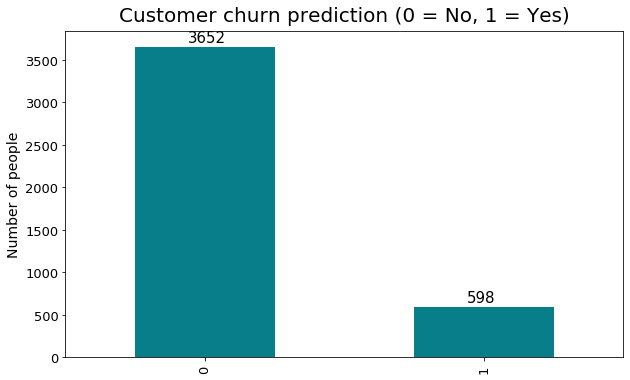

In [29]:
ax = scaled_df['churn'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Customer churn prediction (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of people', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 50, str(round(i.get_height(), 2)), fontsize=15)

we can see that most of the target atrribute values are No. So the model might get biased. So we need to handle it using class imbalance techniques

### Random over sampling

In [30]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42, sampling_strategy='minority')# fit predictor and target variable
X, Y = rus.fit_resample(x, y)


In [31]:
len(X)

7304

## Dimensionality reduction

In [44]:
pca = PCA(n_components=13)
x_pca=pd.DataFrame(pca.fit_transform(X))

x_pca.shape

(7304, 13)

In [45]:
pca.explained_variance_ratio_

array([9.61882324e-01, 7.21718539e-03, 5.06652000e-03, 4.86315281e-03,
       4.62387090e-03, 3.44833506e-03, 2.63549859e-03, 2.59865230e-03,
       2.48232137e-03, 2.44468999e-03, 2.36394399e-03, 3.39264980e-04,
       2.80179309e-05])

In [46]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.951723,0.539528,-1.369031,1.045165,1.574674,-0.729036,1.258363,-0.556740,-1.111512,-0.532201,-0.825282,-0.228972,0.154791
1,-9.944415,-0.779050,-1.165799,1.697147,-2.311297,-1.161511,0.173122,-1.070203,0.432605,-0.312700,0.471110,-0.228214,-0.022734
2,12.046587,-1.287084,2.232765,3.374723,-3.224119,-0.114399,-0.364838,1.328877,0.782175,0.914733,0.373949,0.895379,0.005488
3,-21.951095,1.297984,0.122512,0.949262,-0.822461,0.607743,-0.474786,-0.473143,0.826234,-1.040220,-0.791090,0.859307,-0.006303
4,-7.960014,-1.655739,1.140078,-3.249443,1.565553,0.984270,1.341292,1.836524,-0.580848,-1.004107,0.633390,-0.115577,0.225223


## Splitting the dataset into test and train

In [66]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_pca,Y,test_size=0.4,random_state=0)

## Applying models 

- Decision tree
- Naive bayes
- Logistic regression
- KNN
- SVM

### Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dcls = DecisionTreeClassifier(max_depth= 3)

In [68]:
dcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [69]:
y_pred = dcls.predict(x_test)

In [70]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
accuracy_score(y_test,y_pred)* 100

84.87337440109513

In [73]:
y_test.shape

(2922, 1)

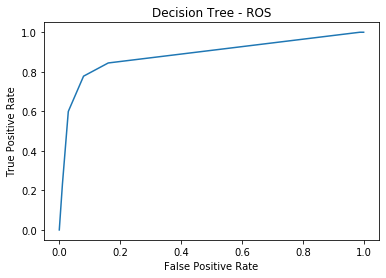

In [75]:
import sklearn.metrics as metrics
y_pred_proba1 = dcls.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)

#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Decision Tree - ROS")
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print("roc_auc_score for model is: ",auc*100)

roc_auc_score for model is:  84.90263459335625


In [77]:
from sklearn.metrics import confusion_matrix

cm1=confusion_matrix(y_test,y_pred)
cm1

array([[1339,  116],
       [ 326, 1141]], dtype=int64)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.908
Recall: 0.778
F1 Score: 0.838


In [152]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(dcls,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.83572895 0.84394251 0.816564   0.83572895 0.83150685]
Accuracy of model with cross validation score is :83.2694251450967


In [153]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(dcls,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.03592896, 0.0219388 , 0.0199461 , 0.02192879, 0.0219481 ]), 'score_time': array([0.00798273, 0.00695586, 0.00498819, 0.00794625, 0.00698042]), 'test_precision': array([0.85818713, 0.85451977, 0.85128983, 0.86587183, 0.85276968]), 'test_recall': array([0.80410959, 0.82876712, 0.76744186, 0.79480164, 0.80136986]), 'test_f1_score': array([0.83026874, 0.84144645, 0.80719424, 0.82881598, 0.82627119])}
Precision of model with precision score is :0.8565276507959776
Precision of model with recall score is :0.7992980154788898
Precision of model with f1 score is :0.8267993205575598


### Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [82]:
y_pred  =  nb.predict(x_test)

In [83]:
 y_pred  

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [85]:
print("Accuracy score: ",ac*100)

Accuracy score:  81.45106091718002


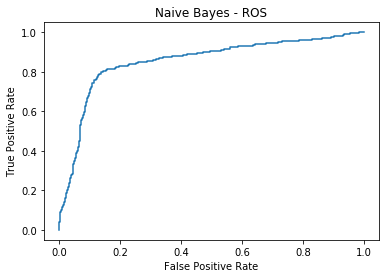

In [86]:
y_pred_proba2 = nb.predict_proba(x_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
plt.title("Naive Bayes - ROS")
#create ROC curve
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [160]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print("roc_auc_score for model is: ",auc*100)

roc_auc_score for model is:  81.44653159895714


In [161]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm2=confusion_matrix(y_test,y_pred)
print(cm2)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1169  286]
 [ 256 1211]]
Precision: 0.809
Recall: 0.825
F1 Score: 0.817


In [162]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(nb,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

Cross Validation Scores are [0.81451061 0.82067077 0.7980835  0.82135524 0.81369863]
Accuracy of model with cross validation score is :81.36637506680543


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [164]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(nb,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

{'fit_time': array([0.00894713, 0.00897551, 0.00892544, 0.00895095, 0.00498843]), 'score_time': array([0.00896907, 0.01098466, 0.01099944, 0.00501204, 0.00598359]), 'test_precision': array([0.8105548 , 0.82773109, 0.80617978, 0.82821229, 0.81805556]), 'test_recall': array([0.82054795, 0.80958904, 0.78522572, 0.81121751, 0.80684932]), 'test_f1_score': array([0.81552076, 0.81855956, 0.7955648 , 0.81962681, 0.81241379])}
Precision of model with precision score is :0.8181467035130252
Precision of model with recall score is :0.806685905964807
Precision of model with f1 score is :0.8123371443952998


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### Logistic Regression

In [165]:
### Applying the logistic regression:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [166]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [167]:
### checking the accuracy of the model:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

In [168]:
print("Accuracy score: ",accuracy_score(y_test,y_pred)*100)

Accuracy score:  77.1047227926078


In [169]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm3=confusion_matrix(y_test,y_pred)
print(cm3)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1105  350]
 [ 319 1148]]
Precision: 0.766
Recall: 0.783
F1 Score: 0.774


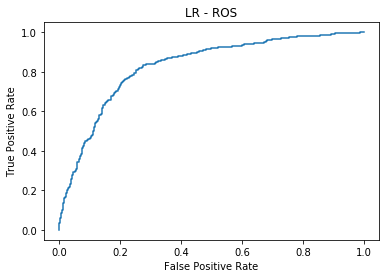

In [170]:
y_pred_proba3 = lr.predict_proba(x_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)

#create ROC curve
plt.plot(fpr3,tpr3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("LR - ROS")
plt.show()

In [171]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print("roc_auc_score for model is: ",auc*100)

roc_auc_score for model is:  77.09997962037681


In [172]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(lr,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

Cross Validation Scores are [0.79055441 0.79945243 0.76728268 0.78302533 0.77739726]
Accuracy of model with cross validation score is :78.35424226228986


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

In [174]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(lr,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

{'fit_time': array([0.11967969, 0.078789  , 0.13264585, 0.13065052, 0.14361548]), 'score_time': array([0.01296639, 0.01196861, 0.01096916, 0.0139637 , 0.01097107]), 'test_precision': array([0.78418231, 0.8038943 , 0.76671214, 0.78910615, 0.77181208]), 'test_recall': array([0.80136986, 0.79178082, 0.76880985, 0.77291382, 0.78767123]), 'test_f1_score': array([0.79268293, 0.79779158, 0.76775956, 0.78092605, 0.77966102])}
Precision of model with precision score is :0.7831413941873231
Precision of model with recall score is :0.7845091168037778
Precision of model with f1 score is :0.7837642281849714


C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

### K Nearest Neighbors

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [92]:
y_pred = knn.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

88.09034907597535

In [94]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm4=confusion_matrix(y_test,y_pred)
print(cm4)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1169  286]
 [  62 1405]]
Precision: 0.831
Recall: 0.958
F1 Score: 0.890


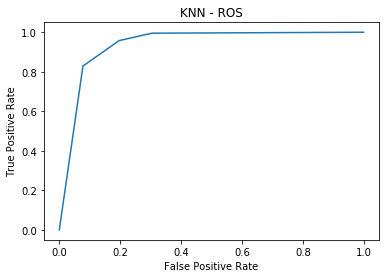

In [96]:
y_pred_proba4 = knn.predict_proba(x_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba4)

#create ROC curve
plt.plot(fpr4,tpr4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("KNN - ROS")
plt.show()

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

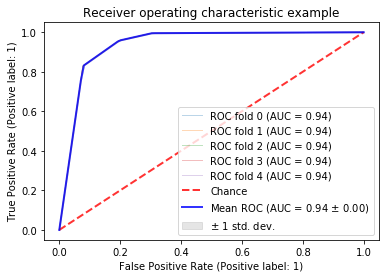

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, Y)):
    knn.fit(x_train,y_train)
    viz = RocCurveDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [180]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_pred)
print("roc_auc_score for model is: ",auc*100)

roc_auc_score for model is:  88.05866520495577


In [181]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(knn,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Cross Validation Scores are [0.91581109 0.91101985 0.91786448 0.90622861 0.91506849]
Accuracy of model with cross validation score is :91.31985035582684


In [182]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(knn,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'fit_time': array([0.01495743, 0.00798059, 0.00598621, 0.00796986, 0.00898433]), 'score_time': array([0.30219078, 0.28128362, 0.27721858, 0.39793611, 0.29723287]), 'test_precision': array([0.87057387, 0.85971223, 0.86586826, 0.84615385, 0.86244019]), 'test_recall': array([0.97671233, 0.98219178, 0.98905609, 0.99316005, 0.98767123]), 'test_f1_score': array([0.92059393, 0.9168798 , 0.92337165, 0.91378225, 0.92081737])}
Precision of model with precision score is :0.8609496803608316
Precision of model with recall score is :0.9857582969473231
Precision of model with f1 score is :0.919088999311457


### Support Vector Machine

In [183]:
# support vector machine
from sklearn.svm import SVC #importing the support vector machine model 
svm=SVC() #initializing the support vector machine  model
svm.fit(x_train,y_train) # training the model
predictions=svm.predict(x_test) # predicting the glass types for test data

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)*100

76.18069815195072

In [185]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm5=confusion_matrix(y_test,predictions)
print(cm5)

print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

[[1071  384]
 [ 312 1155]]
Precision: 0.750
Recall: 0.787
F1 Score: 0.768


In [186]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(svm,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross Validation Scores are [0.69815195 0.71594798 0.69952088 0.7063655  0.70616438]
Accuracy of model with cross validation score is :70.52301388615417


In [188]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(svm,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'fit_time': array([4.48904181, 4.3543992 , 4.51791668, 4.97273111, 4.9876194 ]), 'score_time': array([2.12726307, 1.98967767, 2.16819334, 2.21209002, 2.38765168]), 'test_precision': array([0.70153417, 0.73060029, 0.70977011, 0.71030641, 0.7025572 ]), 'test_recall': array([0.6890411 , 0.68356164, 0.67578659, 0.69767442, 0.71506849]), 'test_f1_score': array([0.69523151, 0.70629866, 0.6923616 , 0.70393375, 0.70875764])}
Precision of model with precision score is :0.7109536370290618
Precision of model with recall score is :0.6922264490377227
Precision of model with f1 score is :0.7013166302926965


## ADA Boost classifier

In [189]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada = ada.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ada.predict(x_test)

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1455
           1       0.86      0.84      0.85      1467

    accuracy                           0.85      2922
   macro avg       0.85      0.85      0.85      2922
weighted avg       0.85      0.85      0.85      2922



In [191]:

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

cm6=confusion_matrix(y_test,y_pred)
print(cm6)

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

[[1249  206]
 [ 238 1229]]
Precision: 0.856
Recall: 0.838
F1 Score: 0.847


In [192]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

84.80492813141683

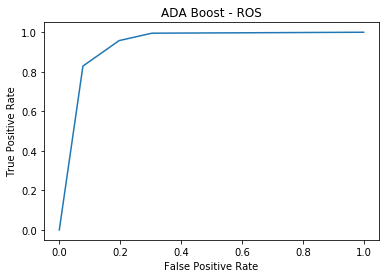

In [193]:
y_pred_proba5 = ada.predict_proba(x_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba4)

#create ROC curve
plt.plot(fpr5,tpr5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ADA Boost - ROS")
plt.show()

In [194]:
# K-fold cross validation

from sklearn.model_selection import cross_val_score,StratifiedKFold

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(ada,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Accuracy of model with cross validation score is :{}".format(score.mean()*100))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross Validation Scores are [0.83230664 0.85831622 0.83778234 0.83709788 0.82876712]
Accuracy of model with cross validation score is :83.88540406739612


In [195]:
from sklearn.model_selection import cross_validate,StratifiedKFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_validate(ada,X,Y,cv=stratifiedkf,scoring=scoring)
print(score)
print("Precision of model with precision score is :{}".format(score["test_precision"].mean()))
print("Precision of model with recall score is :{}".format(score["test_recall"].mean()))
print("Precision of model with f1 score is :{}".format(score["test_f1_score"].mean()))

C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\madap\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'fit_time': array([0.41192722, 0.38995481, 0.40292501, 0.38995862, 0.65624285]), 'score_time': array([0.02190495, 0.02094388, 0.02094102, 0.02593231, 0.04788613]), 'test_precision': array([0.83264746, 0.86068966, 0.85590778, 0.84379358, 0.83994334]), 'test_recall': array([0.83150685, 0.85479452, 0.8125855 , 0.82763338, 0.81232877]), 'test_f1_score': array([0.83207676, 0.85773196, 0.83368421, 0.83563536, 0.82590529])}
Precision of model with precision score is :0.846596365116979
Precision of model with recall score is :0.8277698030470552
Precision of model with f1 score is :0.8370067171583606


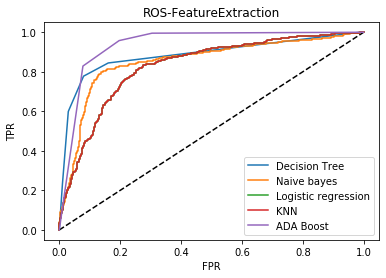

In [88]:
from sklearn.metrics import roc_curve

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Naive bayes")
plt.plot(fpr3, tpr3, label= "Logistic regression")
plt.plot(fpr4, tpr4, label= "KNN")
plt.plot(fpr5, tpr5, label= "ADA Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROS-FeatureExtraction')
plt.show()